## Analysis for Colorado River Basin

This is calculating the zonal statistics, wettest and driest picks, and land cover/use analysis. These are the steps for the analysis only, the outputs are in the `/Data/analysis-data` folder. Use this ONLY if necessary to modify for your own use. **Each part can be ran seperately.** 

- Part 1: Zonal Statisitics - this is calculating the number of each pixel category according to the subbasin hucs 
- Part 2: Wettest and Driest year periods - looking at PDSI to determine periods
- Part 3: Wet and Dry Transition calculations - calculating fractions
- Part 4: Urbanization Analysis

### Part 1: Zonal Statisitics

In [24]:
#Running packages and load files necessary
import geopandas as gpd
import rasterstats 
import numpy as np

huc4_path = '../Data/processed-data/shapefiles/CRB_HUC4.shp'

#read the huc4 shapefile
CRB_huc4 = gpd.read_file(huc4_path)

#List of years to go through 
years = [str(y) for y in range(1984, 2022,1)]

#values to save for dataframe 
zonal_data = {
    'year': [],             #Year 
    'huc4': [],             #huc4 id's 
    'huc_name': [],         #huc4 name 
    'count_total': [],      #number of total water pixels (permanent + seasonal)
    'count_permanent':[],   #number of permanent water pixels 
    'count_seasonal':[],    #number of seasonal water pixels
    'count_nowater': [],    #number of no water pixels
    'count_no_obs': [],     #number of no observation pixels 
    'count_huc': [],        #number of total pixels in the huc, all classificiations 
}

Loop through all the raster files for the years 1984 to 2021 so that we get the number of pixels that are permanent, seasonal, no water, no observation.  \
Pixels are categorized as: 
- 1: No Water 
- 2: Seasonal Water 
- 3: Permanent Water 
- 4: No Observation 

 Total Water is the sum of permanent and seasonal water pixels. 

In [25]:
for yr in years: 
    #import raster file
    raster_path = '../Data/processed-data/yearly_water_history-CRB/' + str(yr) + '_CRB.tif'
    
    #calculate zonal stats 
    count_water = rasterstats.zonal_stats(huc4_path, raster_path, 
                                          stats = ['count'],
                                          categorical = True, 
                                          geojson_out = True)
    
    #get the hucs in order 
    huc4_order = []
    for i in range(0,len(count_water)):
        huc4_id = count_water[i]['properties']['huc4']
        huc4_order.append(int(huc4_id))

    sorted_huc4_i = np.argsort(huc4_order)
    for i in sorted_huc4_i:
        huc4_id = count_water[i]['properties']['huc4']
        huc4_name = count_water[i]['properties']['name']
        count_no_water = count_water[i]['properties'][1] #counting no water pixels
        count_seasonal = count_water[i]['properties'][2] #seasonal
        count_perm = count_water[i]['properties'][3] #permanent
        count_no_obs = count_water[i]['properties'][4] #no observation 
        count_total_water = count_perm + count_seasonal
        count_huc = count_water[i]['properties']['count']

        #append the values to the data 
        zonal_data['huc4'].append(huc4_id)
        zonal_data['huc_name'].append(huc4_name)
        zonal_data['year'].append(yr)
        zonal_data['count_seasonal'].append(count_seasonal)
        zonal_data['count_permanent'].append(count_perm)
        zonal_data['count_total'].append(count_total_water)
        zonal_data['count_no_obs'].append(count_no_obs)
        zonal_data['count_nowater'].append(count_no_water)
        zonal_data['count_huc'].append(count_huc)
    
    print("Finished calculating zonal stats for " + str(yr))


Finished calculating zonal stats for 1984
Finished calculating zonal stats for 1985
Finished calculating zonal stats for 1986
Finished calculating zonal stats for 1987
Finished calculating zonal stats for 1988
Finished calculating zonal stats for 1989
Finished calculating zonal stats for 1990
Finished calculating zonal stats for 1991
Finished calculating zonal stats for 1992
Finished calculating zonal stats for 1993
Finished calculating zonal stats for 1994
Finished calculating zonal stats for 1995
Finished calculating zonal stats for 1996
Finished calculating zonal stats for 1997
Finished calculating zonal stats for 1998
Finished calculating zonal stats for 1999
Finished calculating zonal stats for 2000
Finished calculating zonal stats for 2001
Finished calculating zonal stats for 2002
Finished calculating zonal stats for 2003
Finished calculating zonal stats for 2004
Finished calculating zonal stats for 2005
Finished calculating zonal stats for 2006
Finished calculating zonal stats f

In [28]:
import pandas as pd 
## Create Dataframe from the data 
zonal_df = pd.DataFrame(zonal_data)

########
# Calculating Area 
#  (number of pixels) * (pixel area = 30x30 m^2) / 1e6 to convert to km 
########

#size of pixel 
pixel_area = 30**2 #(meters^2) from literature
#convert to kilometers
km_scale = 1e6


#add calculations of area 
zonal_df['area_total_water']=(zonal_df.count_total * pixel_area) / km_scale
zonal_df['area_permanent']=(zonal_df.count_permanent * pixel_area) / km_scale
zonal_df['area_seasonal']=(zonal_df.count_seasonal * pixel_area) / km_scale
zonal_df['area_nowater'] = (zonal_df.count_nowater * pixel_area) /km_scale 

In [29]:
zonal_df

,year,huc4,huc_name,count_total,count_permanent,count_seasonal,count_nowater,count_no_obs,count_huc,area_total_water,area_permanent,area_seasonal,area_nowater
0,1984,1401,Colorado Headwaters,231912,178710,53202,32900,42481510,42746322,208.7208,160.8390,47.8818,29.6100
1,1984,1402,Gunnison,134992,103707,31285,16677,34231573,34383242,121.4928,93.3363,28.1565,15.0093
2,1984,1403,Upper Colorado-Dolores,74315,43541,30774,33235,35615233,35722783,66.8835,39.1869,27.6966,29.9115
3,1984,1404,Great Divide-Upper Green,624642,519318,105324,83780,92536757,93245179,562.1778,467.3862,94.7916,75.4020
4,1984,1405,White-Yampa,108011,50635,57376,43236,58191249,58342496,97.2099,45.5715,51.6384,38.9124
...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,2021,1503,Lower Colorado,443470,390309,53161,77626,69292021,69813117,399.1230,351.2781,47.8449,69.8634
566,2021,1504,Upper Gila,48195,5667,42528,109598,60540684,60698477,43.3755,5.1003,38.2752,98.6382
567,2021,1505,Middle Gila,70965,15575,55390,54920,66960197,67086082,63.8685,14.0175,49.8510,49.4280
568,2021,1506,Salt,228736,160596,68140,88507,54369575,54686818,205.8624,144.5364,61.3260,79.6563


Save dataframe as .csv file for future use.

In [30]:
zonal_df.to_csv('../Data/analysis-data/huc4_zonal_stats.csv', index=False)

### Part 2: Wettest and Driest year picks
The way these were determined was by the downloaded monthly PDSI data for the Upper and Lower Basin. Calculated the yearly average for the Upper and Lower Basin, then averaged between the Upper and Lower yearly PDSI, to get the yearly average for the Colorado River Basin. More details can be found in the `/Codes/pre-processing.ipynb` Notebook. 

In [35]:
import pandas as pd 
import matplotlib.pyplot as plt

PDSI_data = pd.read_csv('../Data/processed-data/CRB_PDSI_84-21.csv')

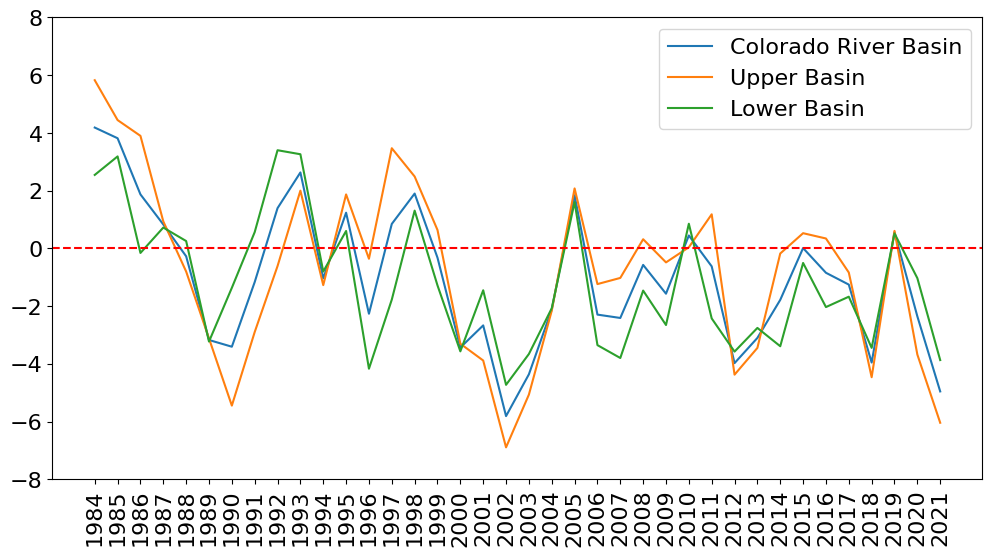

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(PDSI_data['year'], PDSI_data['crb_avg_PDSI'], label = 'Colorado River Basin')
plt.plot(PDSI_data['year'], PDSI_data['upper_avg_PDSI'], label = 'Upper Basin')
plt.plot(PDSI_data['year'], PDSI_data['lower_avg_PDSI'], label = 'Lower Basin')
plt.ylim(-8,8)
plt.xticks(PDSI_data['year'],rotation=90)  # Set x-ticks to be the years
plt.axhline(y=0, color='red', linestyle='--')
plt.legend()

We pick the wettest 3 year period to be 1992 to 1994 according to the PDSI, we note that according to the PDSI values, the wettest is 1984 to 1986, however due to the uncertainty of the surface water dataset in the initial years, we choose the second best. For the driest, we have 2002 to 2004 and the modern period of 2019 to 2021. 

### Part 3: transitions between wettest period and driest periods
See details in method's section of paper. 

In [58]:
from utils.helper_functions import WaterTransitionAnalyzer
import geopandas as gpd 
from shapely.geometry import mapping

#initialize the analyzer
transition_analyzer = WaterTransitionAnalyzer()

## Load shapefile with hucs and raster mode files
huc4_path = '../Data/processed-data/shapefiles/CRB_HUC4.shp'
HUC4_shapefile = gpd.read_file(huc4_path)

#file paths for rasters 
mode_1992_path = '../Data/processed-data/output_mode_1992_1994.tif'
mode_2019_path = '../Data/processed-data/output_mode_2019_2021.tif'
mode_2002_path = '../Data/processed-data/output_mode_2002_2004.tif'

In [60]:
# load huc raster only once, this takes the shapefile and creates a raster to keep track of which HUC the transition is occurring
HUC_shapes = [(mapping(row.geometry), int(row['huc4'])) for _, row in HUC4_shapefile.iterrows()]
#load single raster file to know what the shapefile needs to match 
src, transform = transition_analyzer.load_raster(mode_1992_path)
#Rasterize the shapefile
HUC_raster = transition_analyzer.raster_shapes(HUC_shapes, src.shape, transform)

### This is calculating the transition for the mode starting with year 1992 to mode of 2019. 
The next command, calulates pixel by pixel the transitions that are occurring between period 1 and period 2. For example it looks at a pixel changing from permanent water to something else (ie. seasonal water or no water). 

In [61]:
# Compute transitions
trans_results_df = transition_analyzer.calculate_transitions(mode_1992_path, mode_2019_path, HUC_raster)

Processed HUC 1401
Processed HUC 1402
Processed HUC 1403
Processed HUC 1404
Processed HUC 1405
Processed HUC 1406
Processed HUC 1407
Processed HUC 1408
Processed HUC 1501
Processed HUC 1502
Processed HUC 1503
Processed HUC 1504
Processed HUC 1505
Processed HUC 1506
Processed HUC 1507


Add additional calculations that will be necessary for the figures such as the percent change between the periods. 
For the percent change calculations we just need the water type areas for each period which is also part of these transtion files. 

$$\text{\% change of water type (ie. permanent, seasonal, total)}  = \frac{\text{water type area in period 2} - \text{water type area in period 1}}{\text{water type area in period 1}} * 100 $$

This results in the column as an example for permanent water: `perm_diff_92_19` where it shows the water type `perm` and `diff_92_19` which is the difference from the start year of period 1, in this instance 1992-94, `92` and the period 2, 2019-21 as `19`.

In [ ]:
#change the names
trans_results_df = trans_results_df.rename(columns={'3_area_period1': 'permanent_area_period1',
                                                    '2_area_period1': 'seasonal_area_period1',
                                                    '1_area_period1': 'nowater_area_period1',
                                                    '3_area_period2': 'permanent_area_period2',
                                                    '2_area_period2': 'seasonal_area_period2',
                                                    '1_area_period2': 'nowater_area_period2'
                                                    })

In [67]:
trans_results_df['total_area_period1'] = trans_results_df['permanent_area_period1'] + trans_results_df['seasonal_area_period1']
trans_results_df['total_area_period2'] = trans_results_df['permanent_area_period2'] + trans_results_df['seasonal_area_period2']

trans_results_df['perm_diff_92_19'] = ((trans_results_df['permanent_area_period2']-trans_results_df['permanent_area_period1']) / trans_results_df['permanent_area_period1'])*100
trans_results_df['season_diff_92_19'] = ((trans_results_df['seasonal_area_period2']-trans_results_df['seasonal_area_period1']) / trans_results_df['seasonal_area_period1'])*100
trans_results_df['total_diff_92_19'] = ((trans_results_df['total_area_period2']-trans_results_df['total_area_period1']) / trans_results_df['total_area_period1'])*100

Calculate the percentage of transitions. 

In [71]:
trans_results_df['perm_nowater_perc'] = (trans_results_df['perm_nowater_trans_area'] / trans_results_df['permanent_area_period1'])*100
trans_results_df['perm_season_perc'] = (trans_results_df['perm_seasonal_trans_area'] / trans_results_df['permanent_area_period1'])*100
trans_results_df['seasonal_nowater_perc'] = (trans_results_df['seasonal_nowater_trans_area'] / trans_results_df['seasonal_area_period1'])*100
trans_results_df['seasonal_perm_perc'] = (trans_results_df['seasonal_perm_trans_area'] / trans_results_df['seasonal_area_period1'])*100
trans_results_df['nowater_season_perc'] = (trans_results_df['nowater_seasonal_trans_area'] / trans_results_df['nowater_area_period1'])*100
trans_results_df['nowater_perm_perc'] = (trans_results_df['nowater_perm_trans_area'] / trans_results_df['nowater_area_period1'])*100


Calculate the dry and wet transition annalized rates. 

In [73]:
trans_results_df['dry_trans_area_perc'] = ((trans_results_df['dry_transition_area'] /(trans_results_df['permanent_area_period1'] + trans_results_df['seasonal_area_period1']))/27)*100
trans_results_df['wet_trans_area_perc'] = ((trans_results_df['wet_transition_area'] /(trans_results_df['seasonal_area_period1'] + trans_results_df['nowater_area_period1']))/27)*100


In [75]:
#Save database as .csv file 
trans_results_df.to_csv('../Data/analysis-data/water_type_transitions_92_19.csv', index=False)

Repeating the same processes and calculations for another comparison between two mode files. 

In [ ]:
annualizer = 17 #this is the number of years between the two periods for the dry and wet transition area percentage
transition_df = transition_analyzer.calculate_transitions(mode_2002_path, mode_2019_path, HUC_raster)

#change the names
transition_df = transition_df.rename(columns={'3_area_period1': 'permanent_area_period1',
                                                    '2_area_period1': 'seasonal_area_period1',
                                                    '1_area_period1': 'nowater_area_period1',
                                                    '3_area_period2': 'permanent_area_period2',
                                                    '2_area_period2': 'seasonal_area_period2',
                                                    '1_area_period2': 'nowater_area_period2'
                                                    })


transition_df['total_area_period1'] = transition_df['permanent_area_period1'] + transition_df['seasonal_area_period1']
transition_df['total_area_period2'] = transition_df['permanent_area_period2'] + transition_df['seasonal_area_period2']

transition_df['perm_diff_02_19'] = ((transition_df['permanent_area_period2']-transition_df['permanent_area_period1']) / transition_df['permanent_area_period1'])*100
transition_df['season_diff_02_19'] = ((transition_df['seasonal_area_period2']-transition_df['seasonal_area_period1']) / transition_df['seasonal_area_period1'])*100
transition_df['total_diff_02_19'] = ((transition_df['total_area_period2']-transition_df['total_area_period1']) / transition_df['total_area_period1'])*100

transition_df['perm_nowater_perc'] = (transition_df['perm_nowater_trans_area'] / transition_df['permanent_area_period1'])*100
transition_df['perm_season_perc'] = (transition_df['perm_seasonal_trans_area'] / transition_df['permanent_area_period1'])*100
transition_df['seasonal_nowater_perc'] = (transition_df['seasonal_nowater_trans_area'] / transition_df['seasonal_area_period1'])*100
transition_df['seasonal_perm_perc'] = (transition_df['seasonal_perm_trans_area'] / transition_df['seasonal_area_period1'])*100
transition_df['nowater_season_perc'] = (transition_df['nowater_seasonal_trans_area'] / transition_df['nowater_area_period1'])*100
transition_df['nowater_perm_perc'] = (transition_df['nowater_perm_trans_area'] / transition_df['nowater_area_period1'])*100

transition_df['dry_trans_area_perc'] = ((transition_df['dry_transition_area'] /(transition_df['permanent_area_period1'] + transition_df['seasonal_area_period1']))/annualizer)*100
transition_df['wet_trans_area_perc'] = ((transition_df['wet_transition_area'] /(transition_df['seasonal_area_period1'] + transition_df['nowater_area_period1']))/annualizer)*100

print('Finished all calculations')

Processed HUC 1401
Processed HUC 1402
Processed HUC 1403
Processed HUC 1404
Processed HUC 1405
Processed HUC 1406
Processed HUC 1407
Processed HUC 1408
Processed HUC 1501
Processed HUC 1502
Processed HUC 1503
Processed HUC 1504
Processed HUC 1505
Processed HUC 1506
Processed HUC 1507
Finished all calculations


In [77]:
transition_df

,huc4,permanent_area_period1,seasonal_area_period1,nowater_area_period1,permanent_area_period2,seasonal_area_period2,nowater_area_period2,perm_nowater_trans_area,perm_seasonal_trans_area,seasonal_nowater_trans_area,...,season_diff_92_19,total_diff_92_19,perm_nowater_perc,perm_season_perc,seasonal_nowater_perc,seasonal_perm_perc,nowater_season_perc,nowater_perm_perc,dry_trans_area_perc,wet_trans_area_perc
0,1401,154.6884,51.5214,40.3578,160.2297,89.5428,27.4122,1.9062,13.2561,6.0111,...,73.797296,21.125427,1.232284,8.569550,11.667191,18.706984,41.991883,22.148878,0.603994,2.274335
1,1402,84.1095,36.3699,16.9749,82.3743,47.1501,14.7186,0.5202,9.0981,4.5522,...,29.640444,7.507508,0.618479,10.816971,12.516394,17.289847,44.801442,7.067494,0.691868,1.664311
2,1403,50.0130,29.4939,18.2808,52.0605,30.3561,23.1255,1.0845,3.5334,7.8372,...,2.923316,3.659682,2.168436,7.064963,26.572274,19.871228,23.601812,3.200079,0.921496,1.324895
3,1404,430.4565,117.1989,113.1615,470.3490,146.1897,120.1194,2.6559,10.1169,13.1382,...,24.736410,12.577855,0.616996,2.350272,11.210173,24.908425,36.030540,18.326639,0.278309,2.316161
4,1405,47.4561,61.1937,28.5057,51.0858,70.3098,23.9616,0.5346,6.0597,7.5834,...,14.897122,11.731085,1.126515,12.769064,12.392452,9.655406,35.516055,13.247877,0.767588,1.299045
5,1406,253.4706,96.6762,86.1021,269.3700,103.6215,79.7616,1.2798,14.3442,12.8043,...,7.184085,6.524321,0.504911,5.659118,13.244521,24.983709,22.723139,7.290763,0.477586,1.609018
6,1407,510.9237,51.5898,236.4327,449.0721,92.7270,273.0870,39.1410,28.4436,18.6723,...,79.739018,-3.682472,7.660831,5.567093,36.193782,9.020969,9.320411,0.225350,0.902011,0.555986
7,1408,153.1791,87.0039,116.8218,165.8241,85.9842,118.5471,8.2188,11.1348,28.6749,...,-1.172016,4.840184,5.365484,7.269138,32.958178,21.080779,20.663780,11.089197,1.176272,1.599853
8,1501,676.0125,85.0086,229.4442,551.6226,117.8010,377.2152,118.2591,28.1214,43.4232,...,38.575391,-12.036131,17.493626,4.159893,51.080949,10.919601,6.144631,5.047109,1.467098,0.654010
9,1502,28.8774,81.8712,136.7118,35.9082,92.0277,132.8841,2.6955,4.1796,31.8006,...,12.405461,15.519203,9.334289,14.473602,38.842230,12.276845,27.454543,2.762307,2.054239,1.382197


In [78]:
 #Save database as .csv file 
transition_df.to_csv('../Data/analysis-data/water_type_transitions_02_19.csv', index=False)

## Part 4: calculating the land use analysis

Urbanization is calculated for only the period 1992-94 mode to the 2019-21 since the land cover dataset shows the changes between 2000 to 2020. 

In [1]:
from utils.helper_functions import WaterTransitionAnalyzer
import geopandas as gpd 
from shapely.geometry import mapping

#initialize the analyzer
transition_analyzer = WaterTransitionAnalyzer()

## Load shapefile with hucs and raster mode files
huc4_path = '../Data/processed-data/shapefiles/CRB_HUC4.shp'
HUC4_shapefile = gpd.read_file(huc4_path)

#file paths for rasters 
mode_1992_path = '../Data/processed-data/output_mode_1992_1994.tif'
mode_2019_path = '../Data/processed-data/output_mode_2019_2021.tif'
land_use_path = '../Data/processed-data/CRB_urban_buildup.tif'

In [2]:
# load huc raster only once, this takes the shapefile and creates a raster to keep track of which HUC the transition is occurring
HUC_shapes = [(mapping(row.geometry), int(row['huc4'])) for _, row in HUC4_shapefile.iterrows()]
#load single raster file to know what the shapefile needs to match 
src, transform = transition_analyzer.load_raster(mode_1992_path)
#Rasterize the shapefile
HUC_raster = transition_analyzer.raster_shapes(HUC_shapes, src.shape, transform)

### this will calculate the transitions either wet or dry occurring in urban areas

In [3]:
# Compute transitions
trans_urban_results_df = transition_analyzer.calculate_transition_urban(mode_1992_path,mode_2019_path,land_use_path,HUC_raster)

Processed HUC 1401
Processed HUC 1402
Processed HUC 1403
Processed HUC 1404
Processed HUC 1405
Processed HUC 1406
Processed HUC 1407
Processed HUC 1408
Processed HUC 1501
Processed HUC 1502
Processed HUC 1503
Processed HUC 1504
Processed HUC 1505
Processed HUC 1506
Processed HUC 1507


In [10]:
#get the percentages of each 
trans_urban_results_df['stable-urban_dry_perc'] = (trans_urban_results_df['stable_urban_dry_area'] / trans_urban_results_df['dry_transition_area'])*100
trans_urban_results_df['gained-urban_dry_perc'] = (trans_urban_results_df['gained_urban_dry_area'] / trans_urban_results_df['dry_transition_area'])*100

trans_urban_results_df['urban_dry_perc'] = trans_urban_results_df['stable-urban_dry_perc'] + trans_urban_results_df['gained-urban_dry_perc']

trans_urban_results_df['stable-urban_wet_perc'] = (trans_urban_results_df['stable_urban_wet_area'] / trans_urban_results_df['wet_transition_area'])*100
trans_urban_results_df['gained-urban_wet_perc'] = (trans_urban_results_df['gained_urban_wet_area'] / trans_urban_results_df['wet_transition_area'])*100

trans_urban_results_df['urban_wet_perc'] = trans_urban_results_df['stable-urban_wet_perc'] + trans_urban_results_df['gained-urban_wet_perc']

In [12]:
trans_urban_results_df.columns

Index(['huc4', 'HUC_count', 'gained_urban_area', 'stable_urban_area',
       'dry_transition_area', 'wet_transition_area', 'stable_urban_dry_area',
       'gained_urban_dry_area', 'stable_urban_wet_area',
       'gained_urban_wet_area', 'urbanization_percent',
       'stable-urban_dry_perc', 'gained-urban_dry_perc',
       'stable-urban_wet_perc', 'gained-urban_wet_perc', 'urban_dry_perc',
       'urban_wet_perc'],
      dtype='object')

In [13]:
#save results 
trans_urban_results_df.to_csv('../Data/analysis-data/transitions_urbanization_92_19.csv', index=False)